# Employee Analysis | Attrition Report
## Will Brown
## CS-430 Final Project
### Run on my personal workstation (for speed)
#### Specs:
OS: Ubuntu 22.10

CPU: AMD Ryzen 3700X (3.6-4.4 GHz)

GPU: AMD Radeon RX 5700

Memory: 64GB DDR4-3600 MHz (4x16GB)
### Dataset: https://www.kaggle.com/datasets/whenamancodes/hr-employee-attrition

In [118]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [119]:
attrition = pd.read_csv("HR Employee Attrition.csv")
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [120]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Drop unnecessary columns

In [121]:
attrition.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

### Encode string/labels

In [123]:
columns_to_encode = [
    'Attrition', 'BusinessTravel', 'Department', 'EducationField',
    'Gender', 'JobRole', 'MaritalStatus', 'OverTime'
]
attrition[columns_to_encode].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [124]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in columns_to_encode:
    attrition[col] = le.fit_transform(attrition[col])

In [125]:
attrition.info() # all good :)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int64
 14  JobSatisfaction           1470 non-null 

### Get X and y and scale

In [126]:
X=attrition.drop("Attrition", axis=1)

In [127]:
y=attrition.Attrition

In [128]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X=sc_x.fit_transform(X)
print(X)

[[ 0.4463504   0.59004834  0.74252653 ... -0.0632959  -0.67914568
   0.24583399]
 [ 1.32236521 -0.91319439 -1.2977746  ...  0.76499762 -0.36871529
   0.80654148]
 [ 0.008343    0.59004834  1.41436324 ... -1.16768726 -0.67914568
  -1.15593471]
 ...
 [-1.08667552  0.59004834 -1.60518328 ... -0.61549158 -0.67914568
  -0.31487349]
 [ 1.32236521 -0.91319439  0.54667746 ...  0.48889978 -0.67914568
   1.08689522]
 [-0.32016256  0.59004834 -0.43256792 ... -0.33939374 -0.36871529
  -0.59522723]]


### Split Data

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0) 

### Logistic Regression

In [163]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
print(log_reg.score(X_train, y_train))
print(log_reg.score(X_test, y_test))

0.8707482993197279
0.8741496598639455


### Random Forest

In [164]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=5, random_state=42)
rf_clf.fit(X_train, y_train)
print(rf_clf.score(X_train, y_train))
print(rf_clf.score(X_test, y_test))

0.8758503401360545
0.8503401360544217


### Decision Tree

In [165]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_clf.fit(X_train, y_train)
print(dt_clf.score(X_train, y_train))
print(dt_clf.score(X_test, y_test))

0.9030612244897959
0.8503401360544217


### Support Vector Classifier

In [166]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

0.9132653061224489
0.8571428571428571


In [167]:
#get number of columns in training data
n_cols = X_train.shape[1]
print(n_cols)

# builds model
model = Sequential()

model.add(Dense(512, activation='relu', 
                       input_shape=(n_cols,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.add(Dense(1))

#compile model
model.compile(loss='mse', optimizer='adam', metrics=['mae']) # use metric as mean absolute error

#inspect the model
model.summary()

30
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 512)               15872     
                                                                 
 dense_70 (Dense)            (None, 256)               131328    
                                                                 
 dense_71 (Dense)            (None, 128)               32896     
                                                                 
 dense_72 (Dense)            (None, 2)                 258       
                                                                 
 dense_73 (Dense)            (None, 1)                 3         
                                                                 
Total params: 180,357
Trainable params: 180,357
Non-trainable params: 0
_________________________________________________________________


In [168]:
from keras.callbacks import EarlyStopping
#train model and perform validation test

early_stop = EarlyStopping(monitor='val_loss', patience=30) # stops training when it doesn't show improvemnet.

history = model.fit(X_train, y_train, epochs=300, 
          validation_split=0.2, verbose=1, callbacks=[early_stop])

Epoch 1/300
30/30 [==============================] - 1s 4ms/step - loss: 0.1508 - mae: 0.3191 - val_loss: 0.1300 - val_mae: 0.2781
Epoch 2/300
30/30 [==============================] - 0s 2ms/step - loss: 0.1358 - mae: 0.2805 - val_loss: 0.1248 - val_mae: 0.2734
Epoch 3/300
30/30 [==============================] - 0s 2ms/step - loss: 0.1136 - mae: 0.2720 - val_loss: 0.1171 - val_mae: 0.2613
Epoch 4/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0927 - mae: 0.2201 - val_loss: 0.1157 - val_mae: 0.2378
Epoch 5/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0723 - mae: 0.1796 - val_loss: 0.1251 - val_mae: 0.2252
Epoch 6/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0634 - mae: 0.1526 - val_loss: 0.1265 - val_mae: 0.2094
Epoch 7/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0575 - mae: 0.1366 - val_loss: 0.1450 - val_mae: 0.2363
Epoch 8/300
30/30 [==============================] - 0s 2ms/step - loss: 0.0516 - m

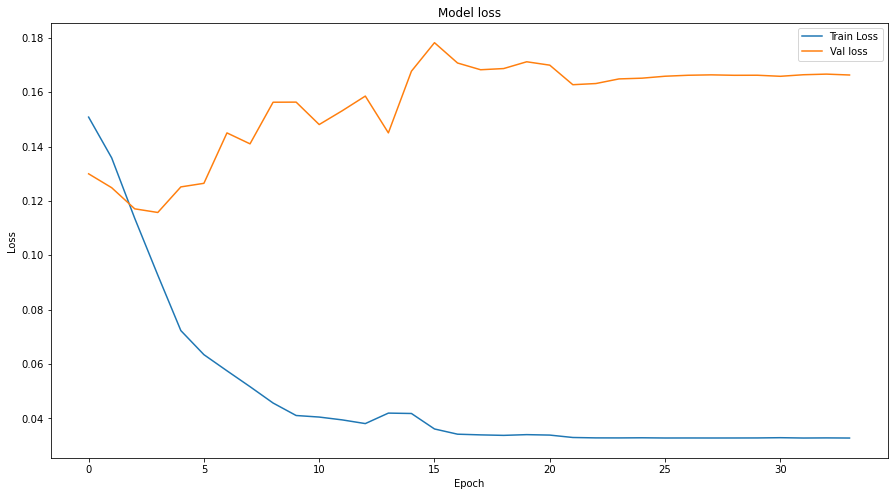

In [169]:
# show the graph of model loss in trainig and validation 

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Loss') #MSE
plt.plot(history.epoch, history.history['loss'],
           label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],
           label = 'Val loss')
plt.title('Model loss')
plt.legend()

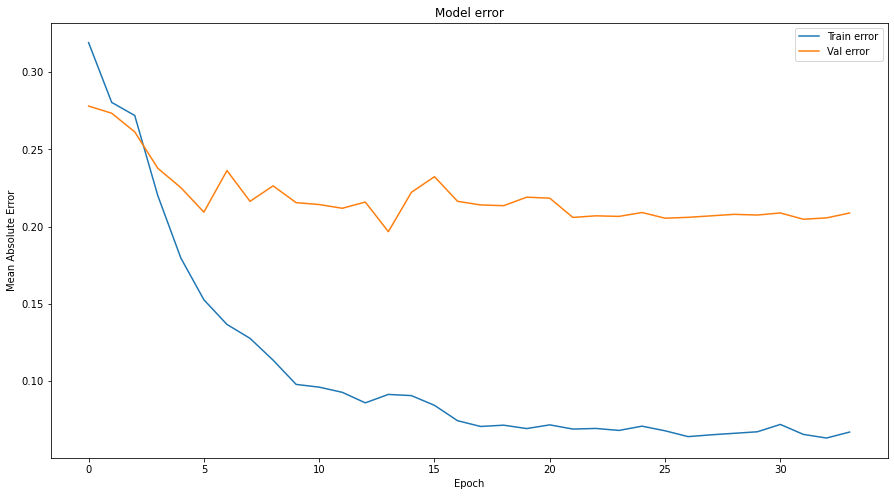

In [170]:
# show the graph of model loss in training and validation 

plt.figure(figsize=(15,8))
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.plot(history.epoch, history.history['mae'],
           label='Train error')
plt.plot(history.epoch, history.history['val_mae'],
           label = 'Val error')
plt.title('Model error')
plt.legend()

In [171]:
score = model.evaluate(X_test, y_test, verbose=1)
print('loss value: ', score[0]) #MSE
print('Mean absolute error: ', score[1])

10/10 [==============================] - 0s 697us/step - loss: 0.1398 - mae: 0.1833
loss value:  0.13976730406284332
Mean absolute error:  0.18330959975719452


In [172]:
# predict employee attrition using the test data 
test_predictions = model.predict(X_test).flatten()

10/10 [==============================] - 0s 769us/step


In [173]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)), 
                    columns=['True Value','Predicted Value'])
true_predicted.sample(10)

,True Value,Predicted Value
186,0,0.041716
31,0,0.041716
291,0,0.041716
237,0,0.041716
251,0,0.041716
22,0,0.042682
160,0,0.041716
228,0,0.041716
70,0,0.041717
140,0,0.041716


## Classification Report

In [186]:
from sklearn.metrics import confusion_matrix, classification_report
print("Logistic Regression")
print(confusion_matrix(y_test, log_reg.predict(X_test)))
print(classification_report(y_test, log_reg.predict(X_test)))
print("Random Forest Classifier")
print(confusion_matrix(y_test, rf_clf.predict(X_test)))
print(classification_report(y_test, rf_clf.predict(X_test)))
print("Decision Tree Classifier")
print(confusion_matrix(y_test, dt_clf.predict(X_test)))
print(classification_report(y_test, dt_clf.predict(X_test)))
print("Support Vector Classifier")
print(confusion_matrix(y_test, svc.predict(X_test)))
print(classification_report(y_test, svc.predict(X_test)))
print("ANN")
print(confusion_matrix(y_test, test_predictions > 0.5))
print(classification_report(y_test, test_predictions > 0.5))

Logistic Regression
[[240   7]
 [ 30  17]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.71      0.36      0.48        47

    accuracy                           0.87       294
   macro avg       0.80      0.67      0.70       294
weighted avg       0.86      0.87      0.86       294

Random Forest Classifier
[[247   0]
 [ 44   3]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       247
           1       1.00      0.06      0.12        47

    accuracy                           0.85       294
   macro avg       0.92      0.53      0.52       294
weighted avg       0.87      0.85      0.79       294

Decision Tree Classifier
[[236  11]
 [ 33  14]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.91       247
           1       0.56      0.30      0.39        47

    accuracy                           0.85